# Практическая работа №2: Классические методы математической статистики
Выполнил студент гр. 1375 Андерсон Алексей. Вариант №2

## Цель работы
Научится применять методы математической статистики для решения задач статистического анализа; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

### 1. Выборочные числовые характеристики:

- **Мат.ожидание:**
  $$\overline{X}=\frac{1}{n}\sum_{i=1}^{n}X_{i}$$

- **Дисперсия:**
  $$S^{2}=\frac{1}{n}\sum_{i=1}^{n}\left( X_{i}-\overline{X} \right)^{2}=\overline{X^{2}}-\overline{X}^{2}$$

### 2. Оценка максимального правдоподобия (ОМП):

- **Функция правдоподобия:**
  $$L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$$

- **Логарифм функции правдоподобия:**
  $$LL(\overrightarrow{X},\theta)=\ln L(\overrightarrow{X},\theta)=\sum_{i=1}^{n}\ln P_{\theta}(X_{i})$$

- **Максимизация логарифма функции правдоподобия:**
  $$\frac{\partial }{\partial \theta}LL(\overrightarrow{X},\theta)=0, \quad i=\overline{1,d}$$

### 3. Оценка метода моментов (ОММ):

- Если $\exists$ единственное решение $\widetilde{\theta}(X)$ системы уравнений:
  $$\widehat{\mu^{k}}(\widetilde{\theta})=\mu_{k}(\theta), \quad k=\overline{1,d}$$
  то $\widetilde{\theta}(X)$ называется оценкой по методу моментов.

### 4. НРМД-оценки (несмещенная оценка):

- Оценка $\widehat{\theta}(X)$ параметра $\theta$ называется несмещенной, если:
  $$\mathbb{E}\widehat{\theta}(X)=\theta$$

### 5. Асимптотический доверительный интервал (АДИ):

#### 5.1 На базе Асимптотической нормальности оценки $\widehat{\theta}$

- Асимптотическая нормальность:
  $$\sqrt{n}\left( \widehat{\theta}(\overrightarrow{X})-\theta)\right)\sim \mathcal{N}\left(0,\sigma^{2}(\theta)\right)$$

- АДИ:
  $$ \widehat{\theta}(\overrightarrow{X})-\frac{X_{\alpha}\cdot \sigma\left( \widehat{\theta}(\overrightarrow{X}) \right)}{\sqrt{n}}; \widehat{\theta}(\overrightarrow{X})+\frac{X_{\alpha}\cdot \sigma\left( \widehat{\theta}(\overrightarrow{X}) \right)}{\sqrt{n}}$$

#### 5.2 на базе ОМП

- Асимптотическая нормальность:
  $$\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}\cdot \left( \widehat{\theta}(\overrightarrow{X})-\theta \right)\sim \mathcal{N}(0,1)$$

- АДИ:
  $$ \widehat{\theta}(\overrightarrow{X})-\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}};\widehat{\theta}(\overrightarrow{X})+\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}} $$

### 6. Критерий $\chi^2$ для проверки гипотез:

- Статистика критерия:
  $$\chi^{2}_{набл} = \sum \limits_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} \sim \chi^{2}_{N-1}$$

### 7. Теорема Колмогорова:

- Статистика Колмогорова:
  $$D_{n}(\overrightarrow{X}) = \overset{}{\underset{-\infty \lt X\lt \infty}{sup}} |F_{n}(X) - F(X)|$$

### 8. Наиболее мощный критерий простой гипотезы:

- Статистика отношения правдоподобия:
  $$\mathrm{LR}(\overrightarrow{X},\theta_{1},\theta_{0})=\frac{L(\overrightarrow{X},\theta_{1})}{L(\overrightarrow{X},\theta_{0})}=\frac{P_{\theta_{1}}(X)}{P_{\theta_{0}}(X)}$$

- Критическая область:
  $$\mathrm{LR}(\overrightarrow{X},\theta_{1},\theta_{0})\gt c$$




## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
### 1.a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

In [216]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp

# Результаты эксперимента
data = [5, 3, 2, 1, 0, 6, 1, 2, 2, 0, 3, 1, 1, 1, 3, 3, 3, 5, 5, 2, 4, 5, 3, 5, 5, 4, 3, 3, 3, 0, 6, 1, 3, 4, 2, 5, 4, 4, 4, 4, 2, 3, 4, 0, 4, 2, 4, 2, 6, 3]

# Сортируем данные для построения вариационного ряда
sorted_data = sorted(data)

# Вариационный ряд
print('Вариационный ряд:')
for i, value in enumerate(sorted_data):
    print( value, end = " ")



Вариационный ряд:
0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 

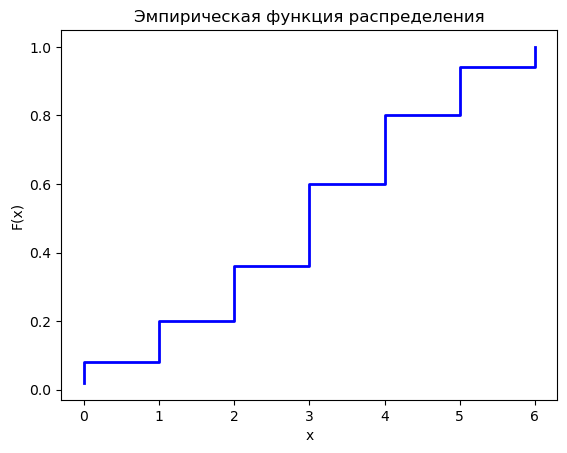

In [35]:
ecdf = np.cumsum(np.ones_like(sorted_data)) / len(sorted_data)


plt.step(sorted_data, ecdf, where='post', color='blue', linewidth=2)
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


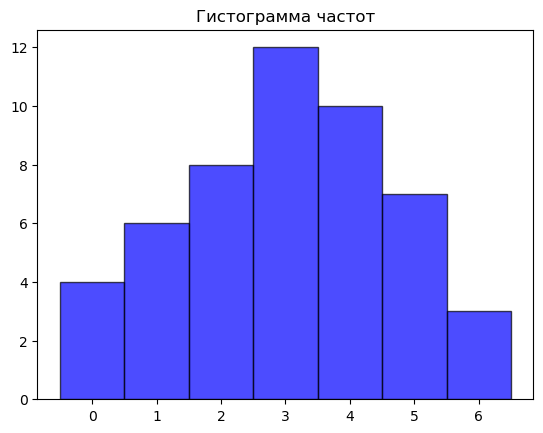

In [55]:
# Гистограмма частот
plt.hist(data, bins=range(min(data), max(data) + 2), align='left', alpha=0.7, rwidth=1, color='blue', edgecolor='black')
plt.title('Гистограмма частот')
plt.show()

### 1.b Вычислить выборочные аналоги следующих числовых характеристик:

In [31]:
from scipy.stats import skew, kurtosis, norm

# Вычисление математического ожидания
mean_value = np.mean(data)

# Вычисление дисперсии
variance = np.var(data, ddof=1)

# Вычисление СКО (стандартное отклонение)
std_deviation = np.std(data, ddof=1)

# Вычисление медианы
median_value = np.median(data)

# Вычисление асимметрии
skewness = skew(data)

# Вычисление эксцесса
kurt = kurtosis(data)

# Вычисление вероятности P(X ∈ (a, b))
a, b = 1.61 , 4.04
probability = np.sum((data > a) & (data < b)) / len(data)

# Вывод результатов
print(f"Математическое ожидание: {mean_value}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_deviation}")
print(f"Медиана: {median_value}")
print(f"Коэффициент асимметрии: {skewness}")
print(f"Коэффициент эксцесса: {kurt}")
print(f"Вероятность P(X ∈ ({a}, {b})): {probability}")


Математическое ожидание: 3.02
Дисперсия: 2.7138775510204085
СКО: 1.6473850645858146
Медиана: 3.0
Коэффициент асимметрии: -0.11518184597243936
Коэффициент эксцесса: -0.7530718775035088
Вероятность P(X ∈ (1.61, 4.04)): 0.6


#### Расшифровка встроенных функций Python:

Математическое ожидание : $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$

Дисперсия : $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$

СКО : $S=\sqrt{S^2}$

Коэфициент асимметрии : $\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$

Коэффициент эксцесса: $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}$

### 1.c В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку максимального правдоподобия параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

#### Плотность распределения Пуассона : $\large q_{\theta} = \frac{\lambda^x}{x!}e^{-\lambda}$

#### Функция правдоподобия : $ L\left(\vec{X}, \theta \right) =\prod\limits_{i = 1}^nq_{\theta}\left(\normalsize x_i\right)=\prod\limits_{i = 1}^n\frac{\lambda^x_i}{x_i!}e^{-\lambda} = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$ 

#### Логарифмирование функции правдоподобия : $LL\left(\vec{X}, \theta \right) = \sum \limits_{i=1}^{n}x_i \cdot \ln{\lambda} - n\lambda + \ln{\left(\prod\limits_{i = 1}^n\frac{1}{\large x_i!}\right)}$

#### Нахождение частной производной по $\lambda$: $\Large \frac{\partial LL}{\partial \lambda} = \frac{\sum \limits_{i=1}^{n}x_i}{\lambda} \normalsize - n  \Rightarrow \widehat{\theta} = \widehat{\lambda} = \overline{X}$ 

#### Нахождение смещения оценки: $\large \mathbb{E}_{\theta}\widehat{\theta} = \mathbb{E}_{\theta}\overline{X} = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i=1}^{n}x_i = \frac{1}{n} \cdot \normalsize n \cdot \lambda = \lambda$

#### Оценка $\lambda$ по методу моментов:
 $\mathbb{E}X_1 = \lambda$
 
 $\mathrm{M_1} =\frac{1}{n}\sum_{i=1}^{n}x_i = \overline{X} \Rightarrow$ ОМП и ОММ совпали $\Rightarrow$ОММ также является несмещенной
 
 $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$

### 1.d Построить асимптотичексий доверительный интервал уровня значимости $\alpha_1 = 0.05$ для параметра $\lambda$ на базе оценки максимального правдоподобия. 

 $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$
 
 $\sqrt{n}\left(\bar{X} - \theta\right) \sim \mathcal{N} \left(0, \frac{1}{I(\theta))}\right)$

$I_n(\theta) = -\mathbb{E}_{\theta}\frac{\partial^2 LL\left(\overrightarrow X,\ \theta\right)}{\partial \theta^2} = \mathbb{E}_{\theta}\frac{\sum_{i=1}^{n}{x_i}}{\lambda^2} = \frac{n\lambda}{\lambda^2} = \frac{n}{\lambda}$

$I(\theta) = {\lim_{n \to \infty}}\frac{1}{\lambda} = \frac{1}{\lambda}$


$\sqrt{\frac{n}{\bar{X}}}\left(\bar{X} - \theta\right) \sim \mathcal{N} \left(0, 1\right)$

$x_{\alpha} : \mathrm{\Phi}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 1 - \frac{0.05}{2} = 0.975$

In [33]:
 norm.ppf(0.975)

1.959963984540054

$x_\alpha \approx 1.96$


$P_\theta\left(-x_\alpha \le \sqrt{\frac{n}{\bar{X}}}\left(\bar{X} - \theta\right) \le x_\alpha\right) \approx 1 - \alpha = 0.98$

$\left[\bar{X} - x_\alpha\sqrt{\frac{\bar{X}}{n}}, \bar{X} + x_\alpha\sqrt{\frac{\bar{X}}{n}}\right] \ni \lambda$


$\left[3.02 - 1.96\sqrt{\frac{3.02}{50}}; 3.02 + 1.96\sqrt{\frac{3.02}{50}}\right] \ni \lambda$

$\left[2.538; 3.502\right] \ni \lambda$

### 1.е Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 6.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [81]:
import numpy as np
import scipy.stats as sps

#параметры распределения Пуассона
lambda_param = 6
intervals = [[0], [1, 2], [3, 4], [5, 6]]

#массивы для экспериментальных и гипотетических частот
observed_freq = np.zeros(len(intervals), dtype=int)
expected_freq_poisson = np.zeros(len(intervals))

print("{:>8} | {:>7} | {:>20}".format("x", "P", "n*P"))

#частоты для каждого интервала
for i in range(len(intervals)):
    start, end = intervals[i][0], intervals[i][-1]
    
    #частота каждого значения в интервале
    for val in intervals[i]:
        observed_freq[i] += np.sum(data == val)
        expected_freq_poisson[i] += len(data) * sps.poisson.pmf(val, lambda_param)
    
    #вывод
    if i == len(intervals) - 1:
        expected_freq_poisson[i] += len(data) * sps.poisson.sf(end, lambda_param)
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))
    else:
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))

#статистика хи-квадрат
chi_square_statistic = np.sum((observed_freq - expected_freq_poisson) ** 2 / expected_freq_poisson)
print("\nСтатистика хи-квадрат:", chi_square_statistic)


       x |       P |                  n*P
[0 , 0 ] |       4 |  0.12393760883331792
[1 , 2 ] |      14 |   2.9745026119996294
[3 , 4 ] |      22 |   11.154384794998613
[5 , 6 ] |      10 |    35.74717498416843

Статистика хи-квадрат: 191.17901538632054


$x_{\alpha_1} : K_{r-d-1}(x_{\alpha_1}) = 1 - \alpha_1$


In [87]:
sps.chi2.ppf(1 - alpha_1, df = len(observed_freq) - 1)

7.814727903251179

$x_{\alpha_1} \approx 7.8$

$\chi^2 \approx 191.2$

$\chi^2 > x_{\alpha_1} \Rightarrow$ Гипотеза отвергается

In [89]:
alpha = alpha_1
step = 0.0001
while chi > chi2.ppf(1 - alpha, df = len(observed_freq) - 1):
    alpha -= step
print('Наибольший уровень значимости: ', alpha)

Наибольший уровень значимости:  -3.987424539858564e-16


### 1.f Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Вычислить наибольшее значение значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

Пусть  $\lambda = \overline{X}$ 

In [94]:
import numpy as np
import scipy.stats as sps

#параметры распределения Пуассона
lambda_param = 3.02
intervals = [[0], [1, 2], [3, 4], [5, 6]]

#массивы для экспериментальных и гипотетических частот
observed_freq = np.zeros(len(intervals), dtype=int)
expected_freq_poisson = np.zeros(len(intervals))

print("{:>8} | {:>7} | {:>20}".format("x", "P", "n*P"))

#частоты для каждого интервала
for i in range(len(intervals)):
    start, end = intervals[i][0], intervals[i][-1]
    
    #частота каждого значения в интервале
    for val in intervals[i]:
        observed_freq[i] += np.sum(data == val)
        expected_freq_poisson[i] += len(data) * sps.poisson.pmf(val, lambda_param)
    
    #вывод
    if i == len(intervals) - 1:
        expected_freq_poisson[i] += len(data) * sps.poisson.sf(end, lambda_param)
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))
    else:
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))

#статистика хи-квадрат
chi_square_statistic = np.sum((observed_freq - expected_freq_poisson) ** 2 / expected_freq_poisson)
print("\nСтатистика хи-квадрат:", chi_square_statistic)


       x |       P |                  n*P
[0 , 0 ] |       4 |   2.4400609181006483
[1 , 2 ] |      14 |   18.496149771386534
[3 , 4 ] |      22 |   19.658363816603178
[5 , 6 ] |      10 |    9.405425493909652

Статистика хи-квадрат: 2.4067383158740236


$x_{\alpha_1} : K_{r-d-1}(x_{\alpha_1}) = 1 - \alpha_1$

In [96]:
sps.chi2.ppf(1 - alpha_1, df = len(observed_freq) - 2)

5.991464547107979

$x_{\alpha_1} \approx 6.0$

$\chi^2 \approx 2.4$

$\chi^2 < x_{\alpha_1} \Rightarrow$ Гипотеза принимается

### 1.g Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $\lambda = \lambda_0 = 6.0$ при альтернативе пуассоновости с параметром $\lambda = \lambda_1 = 3.0$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.05$. Что получится, если поменять местами основную и альтернативную гипотезы?

Основная гипотеза: $H_0 : \lambda = \lambda_0$

Альтернативная гипотеза: $H_A : \lambda = \lambda_1$

Функция правдоподобия: $ L\left(\vec{X}, \theta \right) = \large \lambda^{\sum \limits_{i=1}^{n}x_i} \cdot e^{-n\lambda} \cdot \prod\limits_{i = 1}^n\frac{1}{x_i!}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \lambda_0, \lambda_1\right) = \frac{\mathrm{L}\left(\vec{X}, \lambda_1\right)}{\mathrm{L}\left(\vec{X}, \lambda_0\right)} = \left(\frac{\lambda_1}{\lambda_0}\right)^{\sum \limits_{i = 1}^n x_i} \cdot \exp{\left(-n\left(\lambda_1 - \lambda_0\right)\right)}$ - монотонная функция от МДС $\bar{X}$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} + n\left(\lambda_0 - \lambda_1\right) > c$

$\sum \limits_{i = 1}^n x_i \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)} > c - n\left(\lambda_0 - \lambda_1\right)$

Так как $\lambda_0 > \lambda_1$, то :

$\overline{X} < \frac{c - n\left(\lambda_0 - \lambda_1\right)}{n \cdot \ln{\left(\frac{\lambda_1}{\lambda_0}\right)}}$

$LR\left(\overrightarrow{X}\right) < c \iff \bar{X} < c^*$

 $P_{\lambda_0}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_0}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$

$P_{\lambda_0}\left(n\bar{X} > nc^*\right) + pP_{\lambda_0}\left(n\bar{X} = nc^*\right) = \alpha_1$

Критерий не определен однозначно при $LR(\overrightarrow{X}) = c$

Пусть $LR(\overrightarrow{X}) \neq c$

Тогда $P_{\lambda_0}\left(n\bar{X} > nc^*\right) = 1 - F_{Pois(n\lambda_0)}\left(nc^*\right) = \alpha_1$

$F_{Pois(n\lambda_0)}\left(nc^*\right) = 1 - \alpha_1 = 0.995$


In [98]:
sps.poisson.ppf(0.995, len(data)*lambda_param) / len(data)

3.68

$c^* = 3.68$

$\bar{X} = 3.02$

$c^* > \bar{X} \Rightarrow$ Принимается гипотеза $H_0$

##### Смена гипотез местами

Основная гипотеза: $H_0 : \lambda = \lambda_1$

Альтернативная гипотеза: $H_A : \lambda = \lambda_0$

Статистика отношения правдоподобия :

$LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right) = \frac{L\left(\overrightarrow{X}, \lambda_0\right)}{L\left(\overrightarrow{X}, \lambda_1\right)} = \exp(-n(\lambda_0 - \lambda_1))\left(\frac{\lambda_0}{\lambda_1}\right)^{\sum_{i=1}^{n}{x_i}}$

Так как $LR\left(\overrightarrow{X}, \lambda_1, \lambda_0\right)$ монотонна относительно МДС $\bar{X}$

$LR\left(\overrightarrow{X}\right) > c \iff \bar{X} > c^*$

$P_{\lambda_1}\left(LR(\overrightarrow{X}) > c\right) + pP_{\lambda_1}\left(LR(\overrightarrow{X}) = c\right) = \alpha_1$

$P_{\lambda_1}\left(n\bar{X} > nc^*\right) + pP_{\lambda_1}\left(n\bar{X} = nc^*\right) = \alpha_1$

Критерий не определен однозначно при $LR(\overrightarrow{X}) = c$

Пусть $LR(\overrightarrow{X}) \neq c$

Тогда $P_{\lambda_1}\left(n\bar{X} > nc^*\right) = 1 - F_{Pois(n\lambda_1)}\left(nc^*\right) = \alpha_1$

$F_{Pois(n\lambda_1)}\left(nc^*\right) = 1 - \alpha_1 = 0.995$

In [99]:
sps.poisson.ppf(0.995, len(data)*3) / len(data)

3.64

$c^* = 3.64$

$\bar{X} = 3.02$

$c^* > \bar{X} \Rightarrow$ Принимается гипотеза $H_0$

### 1.h В пунктах (c) - (f) заменить семейство распределений Пуассона на семейство геометрических распределений: $$\mathbb{P}_{\lambda}\left(X = k\right) = \frac{\lambda^k}{(\lambda + 1)^{k+1}}, k \in \mathbb{Z}_+$$

#### 1.h.c

$q_{\theta}(x) = \frac{\lambda^x}{(\lambda + 1)^{x+1}}$, где $x \in \mathbb{Z}_{+}$

Оцениваемый параметр: $\theta = \lambda$

Оценка по методу максимального правдоподобия:

$L\left(\overrightarrow{X}, \theta\right) = \prod_{i=1}^{n}\frac{\lambda^{x_i}}{(\lambda + 1)^{x_i+1}} = \frac{\lambda^{\sum_{i=1}^{n}x_i}}{(\lambda + 1)^{n + \sum_{i=1}^{n}x_i}}$

$LL\left(\overrightarrow{X}, \theta\right) = \sum_{i=1}^{n}x_i\ \ln\lambda - \left(n + \sum_{i=1}^{n}x_i\right)\ln(\lambda+1)$

$\frac{\partial LL\left(\overrightarrow X,\ \theta\right)}{\partial \theta} = \frac{\sum_{i=1}^{n}x_i}{\lambda} - \frac{n + \sum_{i=1}^{n}x_i}{\lambda + 1} = 0 \implies n\lambda+\lambda\sum_{i=1}^{n}x_i = \lambda\sum_{i=1}^{n}x_i + \sum_{i=1}^{n}x_i \implies \hat{\theta} = \hat{\lambda} = \bar{X}$

Смещение:

$\mathbb{E}_\theta\hat{\lambda} = \mathbb{E}_\theta\bar{X} = \frac{1}{n}\mathbb{E}_\theta\sum_{i=1}^{n}x_i = \frac{1}{n}\sum_{i=1}^{n}\mathbb{E}_\theta x_i = \mathbb{E}_\theta x_1 = \sum_{i=1}^{\infty}x_i\frac{\lambda^{x_i}}{(\lambda + 1)^{x_i + 1}} = \lim_{n \to \infty} \sum_{i=1}^{n}x_i\frac{\lambda^{x_i}}{(\lambda + 1)^{x_i + 1}} = \\ = \lim_{n \to \infty} \sum_{x=0}^{n-1}x\frac{\lambda^{x}}{(\lambda + 1)^{x + 1}} = \lim_{n \to \infty} \left(\lambda - \lambda\left(\frac{\lambda}{\lambda + 1}\right)^{n} - n\left(\frac{\lambda}{\lambda + 1}\right)^{n}\right) = \lambda \impliesнесмещенная$


Оценка по методу моментов:

 $\mathbb{E}X_1 = \lambda$
 
 $\mathrm{M_1} =\frac{1}{n}\sum_{i=1}^{n}x_i = \overline{X} \Rightarrow$ ОМП и ОММ совпали $\Rightarrow$ОММ также является несмещенной
 
 $\widetilde{\theta} = \widetilde{\lambda} = \overline{X}$

Численное значение оценок: $\hat{\lambda} = \bar{X} = 2.98$

#### 1.h.d

ОМП: $\hat{\theta}\left(\overrightarrow{X}\right) = \bar{X}$

$\sqrt{n}\left(\bar{X} - \theta\right) \sim \mathcal{N} \left(0, \frac{1}{I(\theta))}\right)$

$I_n(\theta) = -\mathbb{E}_{\theta}\frac{\partial^2 LL\left(\overrightarrow X,\ \theta\right)}{\partial \theta^2} = \mathbb{E}_{\theta}\left(\frac{\sum_{i=1}^{n}{x_i}}{\lambda^2} - \frac{n + \sum_{i=1}^{n}{x_i}}{(\lambda + 1)^2}\right) = \frac{1}{\lambda^2}\sum_{i=1}^{n}\mathbb{E}_{\theta}{x_i} - \frac{1}{(\lambda+1)^2}\sum_{i=1}^{n}\mathbb{E}_{\theta}{x_i} - \frac{n}{(\lambda+1)^2} = \frac{n}{\lambda} - \frac{n\lambda}{(\lambda+1)^2} - \frac{n}{(\lambda+1)^2}$

$I(\theta) = {\lim_{n \to \infty}}\frac{1}{\lambda} - \frac{\lambda}{(\lambda+1)^2} - \frac{1}{(\lambda+1)^2} = \frac{1}{\lambda} - \frac{1}{\lambda+1}$

$I(\hat{\theta}) = \frac{1}{\bar{X}} - \frac{1}{1 + \bar{X}} = \frac{1}{\bar{X}(\bar{X} + 1)}$

$\sqrt{\frac{n}{\bar{X}(\bar{X} + 1)}}\left(\bar{X} - \theta\right) \sim \mathcal{N} \left(0, 1\right)$

 $\Phi(x_\alpha) = 1 - \frac{\alpha}{2} = 0.975$

Тогда $P_\theta\left(-x_\alpha \le \sqrt{\frac{n}{\bar{X}(\bar{X} + 1)}}\left(\bar{X} - \theta\right) \le x_\alpha\right) \approx 1 - \alpha = 0.995$

$\left[\bar{X} - x_\alpha\sqrt{\frac{\bar{X}(\bar{X}+1)}{n}}, \bar{X} + x_\alpha\sqrt{\frac{\bar{X}(\bar{X}+1)}{n}}\right] \ni \lambda$

In [114]:
x_alpha = sps.norm.ppf(0.975)
print("x_alpha = ",x_alpha)
print("[", round(3.02 - x_alpha*np.sqrt(3.02*(3.02 + 1)/50), 2),",", round(3.02 + x_alpha*np.sqrt(3.02*(3.02 + 1)/50), 2), "]")

x_alpha =  1.959963984540054
[ 2.05 , 3.99 ]


$\left[2.05, 3.99\right] \ni \lambda$

#### 1.h.e

Основная гипотеза: $H_0 : F \equiv F_0(\lambda_0)$

Альтернативная гипотеза: $H_A : \exists x : F(x) \neq F_{\lambda_0}(x)$

In [126]:
import numpy as np
import scipy.stats as sps

#параметры распределения Пуассона
lambda_param = 6
intervals = [[0], [1, 2], [3, 4], [5, 6]]

#массивы для экспериментальных и гипотетических частот
observed_freq = np.zeros(len(intervals), dtype=int)
expected_freq_poisson = np.zeros(len(intervals))

print("{:>8} | {:>7} | {:>20}".format("x", "P", "n*P"))

#частоты для каждого интервала
for i in range(len(intervals)):
    start, end = intervals[i][0], intervals[i][-1]
    
    #частота каждого значения в интервале
    for val in intervals[i]:
        observed_freq[i] += np.sum(data == val)
        expected_freq_poisson[i] += len(data) *  lambda_param ** val / (1 + lambda_param) ** (val + 1)
    
    #вывод
    if i == len(intervals) - 1:
        expected_freq_poisson[i] += len(data) * sps.poisson.sf(end, lambda_param)
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))
    else:
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))

#статистика хи-квадрат
chi_square_statistic = np.sum((observed_freq - expected_freq_poisson) ** 2 / expected_freq_poisson)
print("\nСтатистика хи-квадрат:", chi_square_statistic)


       x |       P |                  n*P
[0 , 0 ] |       4 |    7.142857142857143
[1 , 2 ] |      14 |   11.370262390670554
[3 , 4 ] |      22 |    8.353662164574285
[5 , 6 ] |      10 |   25.822245326812762

Статистика хи-квадрат: 33.97826663717091


$x_{\alpha_1} : K_{r-d-1}(x_{\alpha_1}) = 1 - \alpha_1$

In [129]:
sps.chi2.ppf(1 - alpha_1, df = len(freq) - 1)

7.814727903251179

$\chi^2 \approx 34.0$

$x_{\alpha_1} \approx 7.8$

$\chi^2 > x_{\alpha_1} \Rightarrow$ Гипотеза отвергается

Наибольший уровень значимсти 1.96

#### 1.h.f

Пусть  $\lambda = \overline{X}$ 

In [127]:
import numpy as np
import scipy.stats as sps

#параметры распределения Пуассона
lambda_param = 3.02
intervals = [[0], [1, 2], [3, 4], [5, 6]]

#массивы для экспериментальных и гипотетических частот
observed_freq = np.zeros(len(intervals), dtype=int)
expected_freq_poisson = np.zeros(len(intervals))

print("{:>8} | {:>7} | {:>20}".format("x", "P", "n*P"))

#частоты для каждого интервала
for i in range(len(intervals)):
    start, end = intervals[i][0], intervals[i][-1]
    
    #частота каждого значения в интервале
    for val in intervals[i]:
        observed_freq[i] += np.sum(data == val)
        expected_freq_poisson[i] += len(data) *  lambda_param ** val / (1 + lambda_param) ** (val + 1)
    
    #вывод
    if i == len(intervals) - 1:
        expected_freq_poisson[i] += len(data) * sps.poisson.sf(end, lambda_param)
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))
    else:
        print("[{:<2}, {:<2}] | {:>7} | {:>20}".format(start, end, observed_freq[i], expected_freq_poisson[i]))

#статистика хи-квадрат
chi_square_statistic = np.sum((observed_freq - expected_freq_poisson) ** 2 / expected_freq_poisson)
print("\nСтатистика хи-квадрат:", chi_square_statistic)


       x |       P |                  n*P
[0 , 0 ] |       4 |   12.437810945273633
[1 , 2 ] |      14 |   16.363320892135945
[3 , 4 ] |      22 |    9.234921899497332
[5 , 6 ] |      10 |    6.938228563797656

Статистика хи-квадрат: 25.06134742612439


$x_{\alpha_1} : K_{r-d-1}(x_{\alpha_1}) = 1 - \alpha_1$

In [128]:
sps.chi2.ppf(1 - alpha_1, df = len(freq) - 2)

5.991464547107979

$\chi^2 \approx 25.0$

$x_{\alpha_1} \approx 6.0$

$\chi^2 > x_{\alpha_1} \Rightarrow$ Гипотеза отвергается



### 2.a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом $h = 0.20$. 

In [282]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты эксперимента
data_2 = [-2.953, -2.697, -3.056, -3.115, -3.061, -3.333, -2.657, -2.601, -2.706, -4.260, -2.264, -3.067, -3.104, -3.699, -2.849, -3.043, -2.710, -2.583, -2.518, -2.702, -3.688, -2.869, -2.734, -1.650, -3.227, -3.778, -1.852, -3.297, -3.588, -3.248, -2.900, -2.009, -3.115, -3.468, -2.823, -3.224, -3.589, -2.336, -2.463, -2.879, -3.326, -2.896, -3.013, -2.974, -2.735, -2.838, -3.689, -2.648, -3.223, -2.128]

# Сортируем данные для построения вариационного ряда
sorted_data = sorted(data_2)

# Вариационный ряд
print('Вариационный ряд:')
for i, value in enumerate(sorted_data):
    print( value, end = " ")



Вариационный ряд:
-4.26 -3.778 -3.699 -3.689 -3.688 -3.589 -3.588 -3.468 -3.333 -3.326 -3.297 -3.248 -3.227 -3.224 -3.223 -3.115 -3.115 -3.104 -3.067 -3.061 -3.056 -3.043 -3.013 -2.974 -2.953 -2.9 -2.896 -2.879 -2.869 -2.849 -2.838 -2.823 -2.735 -2.734 -2.71 -2.706 -2.702 -2.697 -2.657 -2.648 -2.601 -2.583 -2.518 -2.463 -2.336 -2.264 -2.128 -2.009 -1.852 -1.65 

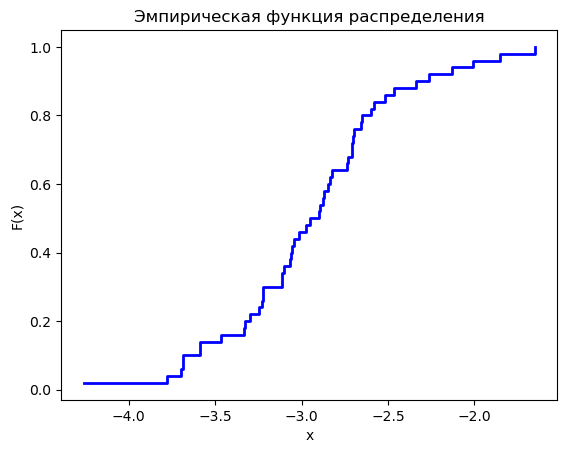

In [141]:
ecdf = np.cumsum(np.ones_like(sorted_data)) / len(sorted_data)


plt.step(sorted_data, ecdf, where='post', color='blue', linewidth=2)
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.show()


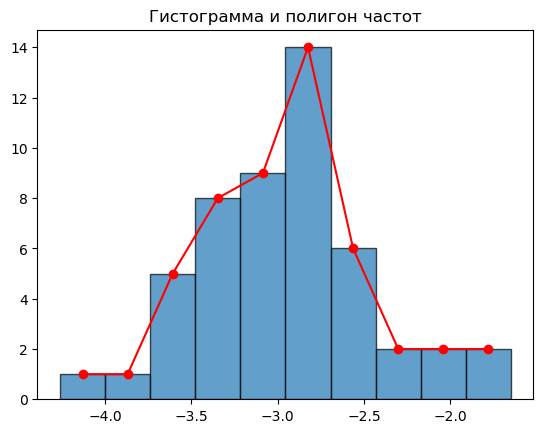

In [166]:
#Гистограмма частот
hist, bins, _ = plt.hist(values, bins=10, edgecolor='black', alpha=0.7)

#Координаты для полигона частот
bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.plot(bin_centers, hist, '-o', color='red')

plt.title('Гистограмма и полигон частот')
plt.show()


### 2.b) Вычислить выборочные аналоги следующих числовых характеристик:

In [323]:
from scipy.stats import skew, kurtosis, norm

# Вычисление математического ожидания
mean_value = np.mean(data)

# Вычисление дисперсии
variance = np.var(data, ddof=1)

# Вычисление СКО (стандартное отклонение)
std_deviation = np.std(data, ddof=1)

# Вычисление медианы
median_value = np.median(data)

# Вычисление асимметрии
skewness = skew(data)

# Вычисление эксцесса
kurt = kurtosis(data)

# Вычисление вероятности P(X ∈ (a, b))
c, d = -3.4 , -2.7
probability = (np.sum(np.array(data_2) <= d) - np.sum(np.array(data_2) <= c)) / len(data_2)

# Вывод результатов
print(f"Математическое ожидание: {mean_value}")
print(f"Дисперсия: {variance}")
print(f"СКО: {std_deviation}")
print(f"Медиана: {median_value}")
print(f"Коэффициент асимметрии: {skewness}")
print(f"Коэффициент эксцесса: {kurt}")
print(f"Вероятность P(X ∈ ({c}, {d})): {probability}")



Математическое ожидание: 3.02
Дисперсия: 2.7138775510204085
СКО: 1.6473850645858146
Медиана: 3.0
Коэффициент асимметрии: -0.11518184597243936
Коэффициент эксцесса: -0.7530718775035088
Вероятность P(X ∈ (-3.4, -2.7)): 0.58


### 2.c) В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия параметров $\left(a, \sigma^2 \right)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

Плотность нормального распределения:
$$p_{\theta}(x) = \frac{1}{\sqrt{2\pi}\sigma} \exp{\left(-\frac{(x - a)^2}{2\sigma^2}\right)}$$

Оценка максимального правдоподобия:

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \left(2\pi \right)^{-\frac{n}{2}} \cdot \sigma^{-n} \cdot \exp{\left(-\frac{1}{2\sigma^2} \sum \limits_{i = 1}^n (x_i - a)^2\right)}$ <br>

$\mathrm{LL}\left(\vec{X}, \vec{\theta}\right) = -\frac{n}{2} \ln{2\pi} - n\ln{\sigma} - \frac{1}{2\sigma^2}\sum \limits_{i = 1}^n (x_i - a)^2$ 

 $a$: 

$\frac{\partial \mathrm{LL}}{ \partial a} = \frac{1}{\sigma^2} \cdot \normalsize \left(\sum \limits_{i = 1}^n x_i - na\right) = 0$ , $\Rightarrow \widehat{a} = \overline{X}$ 

 $\sigma^2$:

$\frac{\partial \mathrm{LL}}{ \partial \sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum \limits_{i = 1}^n (x_i - a)^2 = 0$ , $\Rightarrow \widehat{\sigma^2} = S^2$ 

$\widehat{\theta} = \left(\widehat{a}, \widehat{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОМП 

ОММ:

$\mathbb{E}X_1 = a$ , $M_1 = \overline{X}$ 
$\mathbb{E}X_1^2 = a^2 + \sigma^2$ , $M_2 = \overline{X^2} \Rightarrow \widetilde{\theta} = \left(\widetilde{a}, \widetilde{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОММ

Смещение оценок:

$\mathbb{E}_{\theta}\widehat{a} = \mathbb{E}_{\theta}\widetilde{a} = \mathbb{E}_{\theta}\overline{X} = \frac{1}{n} \sum \limits_{i = 1}^n\mathbb{E}_{\theta}X_1 = \frac{1}{n} \cdot n \cdot a = a$ $\Rightarrow$оценки $a$ несмещённые.

$\mathbb{E}_{\theta}\widehat{\sigma^2} = \mathbb{E}_{\theta}\widetilde{\sigma^2} = \mathbb{E}_{\theta}S^2 = \frac{1}{n}\mathbb{E}_{\theta}\sum \limits_{i = 1}^n \left(X_i - \overline{X}\right)^2 = \left[\begin{array}{l l} X_i - \mathbb{E}_{\theta}X_i = Y_i \\ \mathbb{E}_{\theta}Y_i = 0 \\ \mathbb{D}_{\theta} = \sigma^2 \end{array} \right] = \mathbb{E}_{\theta}\frac{1}{n}\sum \limits_{i = 1}^n \left(Y_i - \overline{Y}\right)^2 = \mathbb{E}_{\theta}\overline{Y^2} - \mathbb{E}_{\theta}\overline{Y}^2$ 

Посчитаем отдельно $\mathbb{E}_{\theta}\overline{Y^2}$ и $\mathbb{E}_{\theta}\overline{Y}^2$:

$\mathbb{E}_{\theta}\overline{Y^2} = \frac{1}{n} \sum \limits_{i = 1}^n\mathbb{E}_{\theta}Y_1^2 = \frac{1}{n} \cdot n \cdot \sigma^2 = \sigma^2$

$\mathbb{E}_{\theta}\overline{Y}^2 = \frac{1}{n^2}\sum \limits_{i = 1}^n \sum \limits_{j = 1}^n \mathbb{E}_{\theta}Y_iY_j = \left[\begin{array}{l l} i = j: \mathbb{E}_{\theta}Y_i^2 = \sigma^2 \\ i \neq j: \mathbb{E}_{\theta}Y_i\mathbb{E}_{\theta}Y_j = 0 \end{array} \right] = \frac{1}{n^2} \left(n \cdot \sigma^2 + \left(n^2 - n\right) \cdot 0\right) = \frac{\sigma^2}{n}$ 

Тогда $\mathbb{E}_{\theta}S^2 = \sigma^2 - \frac{\sigma^2}{n} = \frac{n - 1}{n}\sigma^2$

Смещённая оценка $ (S')^2 = \frac{n}{n - 1} S^2 $

### 2.d) Построить доверительные интервалы уровня значимости $\alpha_2 = 0.10$ для параметров $\left(a, \sigma^2\right)$.

По п. 4 Фишера:

$\mathrm{G}\left(\vec{X}, a\right) = \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \sim S_{n - 1}$ - генератор

$x_{\alpha}: \mathrm{S}_{n-1}(x_{\alpha}) = 1 - \frac{\alpha}{2} = 0.95$

In [173]:
sps.t.ppf(0.95, 49)
    

1.676550891914263

$x_{\alpha} = 1.68 ; x_{2\alpha} = x_{\alpha} = 1.68 ; x_{1\alpha} = -x_{\alpha} = -1.68$ 

$\mathbb{P}_{\theta}\left(-x_{\alpha} \le \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \le x_{\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X} \le a \le \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right) = 1 - \alpha$


 


In [177]:
left = mean_value - 1.68*std_deviation/(49)**0.5
right = mean_value + 1.68*std_deviation/(49)**0.5
print("[", round(left, 2), ",", round(right, 2), "]")

[ -3.07 , -2.82 ]


$\left[-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}, \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right] \ni a$
$\left[-3.07, -2.82\right] \ni a$

По п. 3 леммы Фишера:

$\mathrm{G}\left(\vec{X}, \sigma^2\right) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n-1}$ - генератор.



In [180]:
print("x_1a =", sps.chi2.ppf(0.05, 49))
print("x_2a =", sps.chi2.ppf(0.995, 49))

x_1a = 33.93030561852784
x_2a = 78.23070808668994


$x_{1\alpha}: \mathrm{K}_{n-1}(x_{1\alpha}) = \frac{\alpha}{2}  = 0.05 \Rightarrow x_{1\alpha} = 33.93$

$x_{2\alpha}: \mathrm{K}_{n-1}(x_{2\alpha}) = 1 - \frac{\alpha}{2} = 0.995 \Rightarrow x_{2\alpha} = 78.23$

$\mathbb{P}_{\theta}\left(x_{1\alpha} \le \frac{nS^2}{\sigma^2} \le x_{2\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(\frac{nS^2}{x_{2\alpha}} \le \sigma^2 \le \frac{nS^2}{x_{1\alpha}}\right) = 1 - \alpha$

$\left[\frac{nS^2}{x_{2\alpha}}, \frac{nS^2}{x_{1\alpha}}\right] \ni \sigma^2$

In [184]:
left = 50*variance/(78.23)
right = 50*variance/(33.93)
print("[", round(left,2), ",", round(right,2), "]")

[ 0.16 , 0.38 ]



$\left[0.16, 0.38\right] \ni \sigma^2$

### 2.e) С использованием теоремы Колмогорова построить критерий значимости проверки простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2) = (-1.00, 0.50)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.10$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

критерий Колмогорова $\eta = \sqrt{n}D_n$:

In [193]:
a = -1.00
D = 0.50
sigma = np.sqrt(D)
n = len(data_2)

cdf = lambda x: norm.cdf(x, loc = a, scale = sigma)
Dn, _ = kstest(data_2, cdf)
n**0.5 * Dn


6.255560979322091

In [195]:
a = 0.1
kstwobign.ppf(1 - a)

1.2238478702170825

$V_k = (1.36, + \infty)$

$\eta \in V_k \Rightarrow$ гипотеза отвергается

In [284]:
while eta > 6.26:
    alpha -= 0.1
    d = kstwobign.ppf(1 - alpha)
print('Наибольший уровень значимости:',a)

Наибольший уровень значимости: -1


### 2.f) Используя гистограмму частот, построить критерии значимости $\chi^2$ проверки простой гипотезы согласия с нормальным распределением с параметрами $(a_0, \sigma_0^2) = (-1.00, 0,25)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.10$. Вычислить наибольшее значение уровня значимости, на котором ещё нет оснований отвергнуть данную гипотезу.

In [355]:
a = -1
sigma = 0.5
alpha_2 = 0.1

edges = [-4.0, -2.3, -1.12, 0] 


p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1 )
print('P2 = ', p2 )
print('P3 = ', p3 )
print('P4 = ', p4 )
print('n*P1 = ', n * p1)
print('n*P2 = ', n * p1)
print('n*P3 = ', n * p1)
print('n*P4 = ', n * p1)

groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])

chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Xi^2: ", round(chi, 2))
print('x_a1:', round(chi2.ppf(1 - alpha_2, 3), 2))


P1 =  9.865876450376946e-10
P2 =  0.004661187037131107
P3 =  0.40050394027848535
P4 =  0.5948348716977958
n*P1 =  4.932938225188473e-08
n*P2 =  4.932938225188473e-08
n*P3 =  4.932938225188473e-08
n*P4 =  4.932938225188473e-08
Xi^2:  458.97
x_a1: 6.25


 $\chi^2 = 458.97$

$\chi_{k-1, \alpha_2}^2 = \chi_{3, 0.1}^2 = 6.25$ 
 $\chi^2 > \chi_{3, 0.1}^2 \Rightarrow$ Гипотеза отвергается

In [301]:
alpha = 0.1
step = 0.001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

Наибольший уровень значимости:  0.1


### 2.g) Построить критерий проверки значимости $\chi^2$ сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $\alpha_2 = 0.05$. Вычислить наибольшее значение уровня значимости, на которос ещё нет оснований отвергнуть данную гипотезу.

In [306]:
a = mean_value
sigma = std_deviation
alpha_2 = 0.1

edges = [-4.0, -2.3, -1.12, 0]

p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1 )
print('P2 = ', p2 )
print('P3 = ', p3 )
print('P4 = ', p4 )
print('n*P1 = ', n * p1)
print('n*P2 = ', n * p1)
print('n*P3 = ', n * p1)
print('n*P4 = ', n * p1)

groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])

chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Xi^2: ", round(chi, 2))
print('x_a1:', round(chi2.ppf(1 - alpha_2, 3), 2))


P1 =  0.018399483192645782
P2 =  0.879985235837504
P3 =  0.10145914829589497
P4 =  0.0001561326739553115
n*P1 =  0.9199741596322891
n*P2 =  0.9199741596322891
n*P3 =  0.9199741596322891
n*P4 =  0.9199741596322891
Xi^2:  267.67
x_a1: 6.25


 $\chi^2 = 267.67$

$\chi_{k-1, \alpha_2}^2 = \chi_{3, 0.1}^2 = 6.25$ 
 $\chi^2 > \chi_{3, 0.1}^2 \Rightarrow$ Гипотеза отвергается

In [304]:
alpha = 0.1
step = 0.001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

Наибольший уровень значимости:  0.1


### 2.h) Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметром $\left(a, \sigma^2\right) = \left(a_0, \sigma_0^2\right) = \left(-1, 0.25\right)$ при альтернативе нормальности с параметром $\left(a, \sigma^2\right) = \left(a_1, \sigma_1^2\right) = \left(-3, 0.25\right)$. Проверить гипотезу на уровне значимости $\alpha_2 = 0.1$. Что получится, если поменять местами основновную и альтернативную гипотезы?

Основная гипотеза $H_0: \theta_0 = \left( a_0, \sigma^2_0\right) = (-1, 25)$

Альтернативная гипотеза $H_1: \theta_1 = \left( a_1, \sigma^2_1\right) = (15, 25)$

Функция правдоподобия:$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = \left(2\pi \right)^{-\frac{n}{2}} \cdot \sigma^{-n} \cdot \exp{\left(-\frac{1}{2\sigma^2} \sum \limits_{i = 1}^n (x_i - a)^2\right)}$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{\left(\frac{n}{2\sigma^2}\left(a_0^2 - a_1^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_1 - a_0\right)\right)}$ 

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

$\sqrt{n} \frac{\overline{X} - a_0}{\sigma} \sim \mathcal{N}(0, 1)$ при $H_0$

In [324]:

((3.02 - a_0)/0.5) * 50**0.5


56.851385207398415

$\sqrt{n} \frac{\overline{X} - a_0}{\sigma} = 56.85$

$c^* : \Phi(c^*) = 1 - \alpha_2 = 1 - 0.05 = 0.9$

In [326]:
norm.cdf(0.9)

0.8159398746532405

 $c^* = 0.82$

$\sqrt{n} \frac{\overline{X} - a_0}{\sigma} > c^* \Rightarrow$ гипотеза не принимается

Смена гипотез местами

*Основная гипотеза* $H_0: \theta_0 = \left( a_1, \sigma^2_1\right)$

*Альтернативная гипотеза* $H_1: \theta_1 = \left( a_0, \sigma^2_0\right)$

*Статистика отношения правдоподобия:*

$\mathrm{LR}\left(\vec{X}, \vec{\theta_0}, \vec{\theta_1}\right) = \frac{\mathrm{L}\left(\vec{X}, \vec{\theta_1}\right)}{\mathrm{L}\left(\vec{X}, \vec{\theta_0}\right)} = \exp{\left(\frac{n}{2\sigma^2}\left(a_1^2 - a_0^2\right) + \frac{1}{\sigma^2}\sum \limits_{i = 1}^n x_i \cdot \left(a_0 - a_1\right)\right)}$ 

$\mathrm{LR} > c \iff \overline{X} < c^*$

$\mathrm{LR} < c \iff \overline{X} > c^*$

$\sqrt{n} \frac{\overline{X} - a_1}{\sigma} \sim \mathcal{N}(0, 1)$ при $H_1$

$\mathbb{P}\left(\sqrt{n}\frac{\overline{X} - a_1}{\sigma} \geq \sqrt{n}\frac{c^* - a_1}{\sigma}\right) = 1 - \Phi\left(\sqrt{n}\frac{c^* - a_1}{\sigma}\right) = \alpha_2$

$\sqrt{n}\frac{c^* - a_1}{\sigma} = x_{\alpha}$

$x_{\alpha} : \Phi(x_{\alpha}) = 1 - \alpha_2 = 0.9$




In [329]:
x_alpha = norm.cdf(0.9)
sigma = 0.5
a_1 = -3
(x_alpha * sigma)/n**0.5 + a_1


-2.9423043381592193

$c^* = -2.9$

$\overline{X} = 3.02$

 $\overline{X} > c^* \Rightarrow$ гипотеза принемается

### 2.i) В пунктах (c) - (g) заменить семейство нормальных распределенеий на двухпараметрическое семейство распределений Лапласа с плотностями:
$$p_{a, \sigma}(x) = \frac{1}{\sqrt{2}\sigma} \exp{\left(-\frac{\sqrt{2}}{\sigma} \left| x - a\right|\right)}$$

#### 2.i.c

ОМП:

$\mathrm{L}\left(\vec{X}, \vec{\theta}\right) = 2^{-\frac{n}{2}} \sigma^{-n} \exp\left(-\frac{\sqrt{2}}{\sigma} \sum \limits_{i = 1}^{n} |x_i - a|\right)$

$\mathrm{LL}\left(\vec{X}, \vec{\theta}\right) = -\frac{n}{2}\ln{2} - n\ln{\sigma} - \frac{\sqrt{2}}{\sigma}\sum \limits_{i = 1}^{n} |x_i - a|$

$\frac{\partial\mathrm{LL}}{\partial \sigma} = -\frac{n}{\sigma} + \frac{\sqrt{2}}{\sigma^2}\sum \limits_{i = 1}^{n} |x_i - \widehat{a}| = 0 \Rightarrow \widehat{\sigma}^2 = \frac{2}{n^2}\left(\sum \limits_{i = 1}^{n} |x_i - \widehat{a}|\right)^2$ - ОМП параметра $\sigma^2$

$\frac{\partial\mathrm{LL}}{\partial a} = -\Large\frac{\sqrt{2}}{\widehat{\sigma}} \normalsize \sum \limits_{i = 1}^n \mathrm{sgn}\left(x_i - a\right) = 0$

Так как $\frac{\partial\mathrm{LL}}{\partial a}$ - монотонно убывающая функция, то ОМП параметра а - выборочная медиана.

$\widehat{a} = z_{n, \frac{1}{2}} = \begin{cases} X_{\lfloor \frac{n}{2} \rfloor + 1} , np \in \mathbb{Z} \\ \\ \left[X_{\left(\frac{n}{2}\right)}, X_{\left(\frac{n}{2} + 1\right)}\right), np \notin \mathbb{Z} \end{cases}$
$\widehat{\theta} = \left(\widehat{a}, \widehat{\sigma}^2 \right)$

ОММ:

$\mathbb{E}x = a$ , $\mathrm{M}_1 = \overline{X}$

$\mathbb{E}x^2 = \sigma^2 + a^2$, $\mathrm{M}_2 = \overline{X^2}$

$\begin{equation} \begin{cases} \overline{X} = a \\ \overline{X^2} = a^2 + \sigma^2 \end{cases}\end{equation}\Rightarrow \widetilde{\theta} = \left(\widetilde{a}, \widetilde{\sigma^2}\right) = \left(\overline{X}, S^2\right)$ - ОММ

Смещение оценок:

$\mathbb{E}_{\theta} \widehat{a} = \mathbb{E}_{\theta}z_{n, \frac{1}{2}} = \mathbb{E} \frac{X_{\frac{n}{2}} + X_{\frac{n}{2} + 1}}{2} = a \rightarrow$ несмещённая

$\mathbb{E}_{\theta} \widehat{\sigma^2} \neq \sigma^2 \rightarrow$ смещённая 

$\mathbb{E}_{\theta} \widetilde{a} = \mathbb{E}_{\theta} \overline{X} = a \rightarrow$ несмещённая 

$\mathbb{E}_{\theta}\widetilde{\sigma^2} = \mathbb{E}_{\theta} S^2 = \frac{n -1}{n} \sigma^2 \rightarrow$ смещённая 

#### 2.i.d 

По п.4 Фишера:

$\mathrm{G}\left(\vec{X}, a\right) = \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S}  \sim S_{n - 1}$ - генератор.

$x_{\alpha}: \mathrm{S}_{n-1}(x_{\alpha}) = 1 - \frac{\alpha}{2}  = 0.995 \Rightarrow x_{\alpha} = 1.96 \Rightarrow x_{2\alpha} = x_{\alpha} = 1.96, x_{1\alpha} = -x_{\alpha} = -1.96$

$\mathbb{P}_{\theta}\left(-x_{\alpha} \le \sqrt{n - 1} \cdot \frac{\overline{X} - a}{S} \le x_{\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X} \le a \le \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right) = 1 - \alpha$

$$\left[-\frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}, \frac{x_{\alpha} \cdot S}{\sqrt{n - 1}} + \overline{X}\right] \ni a$$





In [340]:
alpha_2 = 0.1

x_alpha = 1.96
left_a = -(x_alpha * std_deviation)/(n - 1)**0.5 + 3.02
right_a = (x_alpha * std_deviation)/(n - 1)**0.5 + 3.02

print( [round(left_a, 2), round(right_a, 2)])


[2.56, 3.48]


$\left[2.56, 3.48\right] \ni a$

По п.3 Фишера:

$\mathrm{G}\left(\vec{X}, \sigma^2\right) = \frac{nS^2}{\sigma^2} \sim \chi^2_{n-1}$ - генератор.

$x_{1\alpha}: \mathrm{K}_{n-1}(x_{1\alpha}) = \frac{\alpha}{2} =  0.05 \Rightarrow x_{1\alpha} = 34.37$

$x_{2\alpha}: \mathrm{K}_{n-1}(x_{2\alpha}) = 1 - \frac{\alpha}{2} = 0.95 \Rightarrow x_{2\alpha} = 67.22$ , так как распределение несимметричное.

$\mathbb{P}_{\theta}\left(x_{1\alpha} \le \frac{nS^2}{\sigma^2} \le x_{2\alpha}\right) = 1 - \alpha$

$\mathbb{P}_{\theta}\left(\frac{nS^2}{x_{2\alpha}} \le \sigma^2 \le \frac{nS^2}{x_{1\alpha}}\right) = 1 - \alpha$

$\left[\frac{nS^2}{x_{2\alpha}}, \frac{nS^2}{x_{1\alpha}}\right] \ni \sigma^2$


In [350]:
df = n - 1
x_1alpha = chi2.ppf(alpha_2 / 2, df)
x_2alpha = chi2.ppf(1 - alpha_2 / 2, df)

left_sigma = (n*variance)/x_2alpha
right_sigma = (n*variance)/x_1alpha
print( [round(left_sigma, 2), round(right_sigma, 2)])

[2.05, 4.0]


$\left[2.05, 4.0\right] \ni \sigma^2$

#### 2.i.e

Критерий Колмогорова $\eta = \sqrt{n}D_n$

In [353]:
a = -1.00
D = 0.50
sigma = np.sqrt(D)
 
cdf = lambda x: laplace.cdf(x, loc = a, scale = sigma)
Dn, _ = kstest(data_2, cdf)
eta = n**0.5 * Dn
print('Критерий Колмогорова:', round(eta, 2))

alpha = 0.1
d = kstwobign.ppf(1 - alpha)
print('Квантиль:', round(d, 2))


while eta < d:
    alpha += 0.001
    d = kstwobign.ppf(1 - alpha)
print('Наибольший уровень значимости:', round(alpha, 3))

Критерий Колмогорова: 5.94
Квантиль: 1.22
Наибольший уровень значимости: 0.1


 $V_k = (d_{1 - \alpha},+ \infty) = (1.22,+ \infty)$
 
 $\eta \in V_k \Rightarrow$ гипотеза отвергается

#### 2.i.f

In [359]:
a = -1
sigma = 0.5
alpha_2 = 0.1

edges = [-4.0, -2.3, -1.12, 0]

p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1 )
print('P2 = ', p2 )
print('P3 = ', p3 )
print('P4 = ', p4 )
print('n*P1 = ', n * p1)
print('n*P2 = ', n * p1)
print('n*P3 = ', n * p1)
print('n*P4 = ', n * p1)

groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])

chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Xi^2: ", round(chi, 2))
print('x_a1:', round(chi2.ppf(1 - alpha_2, 3), 2))


P1 =  9.865876450376946e-10
P2 =  0.004661187037131107
P3 =  0.40050394027848535
P4 =  0.5948348716977958
n*P1 =  4.932938225188473e-08
n*P2 =  4.932938225188473e-08
n*P3 =  4.932938225188473e-08
n*P4 =  4.932938225188473e-08
Xi^2:  458.97
x_a1: 6.25


$\chi^2 > \chi_{3, 0.1}^2 \Rightarrow$ гипотеза отвергается

In [365]:
alpha = 0.1
step = 0.001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

Наибольший уровень значимости:  0.1


#### 2.i.g

In [362]:
a = -1
sum_abs = 0
for item in data_2:
    sum_abs += abs(item + 1)
sigma = (2**0.5/n) * sum_abs
alpha_2 = 0.1

edges = [-4.0, -2.3, -1.12, 0]

p1 = norm.cdf(edges[0], a, sigma)
p2 = norm.cdf(edges[1], a, sigma) - norm.cdf(edges[0], a, sigma)
p3 = norm.cdf(edges[2], a, sigma) - norm.cdf(edges[1], a, sigma)
p4 = 1 - p1 - p2 - p3
print('P1 = ', p1 )
print('P2 = ', p2 )
print('P3 = ', p3 )
print('P4 = ', p4 )
print('n*P1 = ', n * p1)
print('n*P2 = ', n * p1)
print('n*P3 = ', n * p1)
print('n*P4 = ', n * p1)

groups = [[],[],[],[]]
cur_edge_index = 0
cur_group = 0

for item in data_2:
    cur_edge = edges[cur_edge_index]
    if item <= cur_edge:
        groups[cur_group].append(item)
    else:
        cur_group += 1
        groups[cur_group].append(item)
        cur_edge_index += 1

n1, n2, n3, n4 = len(groups[0]), len(groups[1]), len(groups[2]), len(groups[3])

chi = ((n1 - n*p1)**2) / (n*p1) + ((n2 - n*p2)**2) / (n*p2) + ((n3 - n*p3)**2) / (n*p3) + ((n4 - n*p4)**2) / (n*p4)
print("Xi^2: ", round(chi, 2))
print('x_a1:', round(chi2.ppf(1 - alpha_2, 3), 2))


P1 =  0.13755228458086927
P2 =  0.18057839956547955
P3 =  0.16445889971824146
P4 =  0.5174104161354098
n*P1 =  6.877614229043464
n*P2 =  6.877614229043464
n*P3 =  6.877614229043464
n*P4 =  6.877614229043464
Xi^2:  155.65
x_a1: 6.25


$\chi^2 > \chi_{3, 0.1}^2 \Rightarrow$ гипотеза отвергается

In [366]:
alpha = 0.1
step = 0.0001
while chi < chi2.ppf(1 - alpha, 3):
    alpha += step
print('Наибольший уровень значимости: ', round(alpha, 5))

Наибольший уровень значимости:  0.1


## Выводы


В данной практической работе были изучены методы математической статистики с использованием языка программирования Python.Была проведена работа с нахождением выборочных аналогов числовых характеристик, определением ОМП и ОММ оценкок, построением доверительных интервалов и работа с гипотезами.